In [27]:
import kagglehub

path = kagglehub.dataset_download("erdemtaha/cancer-data")

print("Path to dataset files:", path)

!ls {path}

Path to dataset files: /root/.cache/kagglehub/datasets/erdemtaha/cancer-data/versions/1
Cancer_Data.csv


In [28]:
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np
import sys

In [29]:
def load_data(path: str, file: str) -> pd.DataFrame:
  """
  Load data from csv file

  Params
  path: path to the csv file
  file: name of the csv file

  Returns
  features: features of the dataset
  labels: labels of the dataset
  """
  df = pd.read_csv(path + file, skiprows=1)
  df = df.iloc[:, 1:32]
  df.iloc[:, 0] = df.iloc[:, 0].map({'M': 0, 'B': 1})

  labels = df.iloc[:, 0]
  features = df.iloc[:, 1:]

  return features, labels

In [30]:
def separete_data(labels: pd.DataFrame, features: pd.DataFrame) -> pd.DataFrame:
  """
  Separete data into train and test sets

  Params
  features: features of the dataset
  labels: labels of the dataset

  Returns
  X_train: train set of features
  X_test: test set of features
  y_train: train set of labels
  y_test: test set of labels
  """
  from sklearn.model_selection import train_test_split

  X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42, shuffle=True)

  return X_train.astype(np.float32), X_test.astype(np.float32), y_train.astype(np.int32), y_test.astype(np.int32)

In [31]:
def create_model(input_dim: int) -> Sequential:
  """
  Create a neural network model

  Params
  input_dim: number of input features

  Returns
  model: neural network model
  """
  model = Sequential()

  model.add(Dense(32, input_dim=input_dim, activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model

In [32]:
def train_model(model: Sequential, X_train: pd.DataFrame, y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> None:
  """
  Train a neural network model

  Params
  model: neural network model
  X_train: train set of features
  y_train: train set of labels

  Returns
  None
  """
  return model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

In [33]:
def evaluate_model(model: Sequential, X_test: pd.DataFrame, y_test: pd.DataFrame) -> None:
  """
  Evaluate a neural network model

  Params
  model: neural network model
  X_test: test set of features
  y_test: test set of labels

  Returns
  None
  """
  scores = model.evaluate(X_test, y_test)
  print('\n%s: %.2f%%' % (model.metrics_names[1], scores[1]*100))

In [34]:
def print_matrix_confusion(model: Sequential, X_test: pd.DataFrame, y_test: pd.DataFrame) -> None:
  """
  Print a confusion matrix

  Params
  model: neural network model
  X_test: test set of features
  y_test: test set of labels

  Returns
  None
  """

  from sklearn.metrics import confusion_matrix
  import seaborn as sns
  import matplotlib.pyplot as plt

  y_pred = model.predict(X_test)
  y_pred = (y_pred > 0.5)
  cm = confusion_matrix(y_test, y_pred)
  sns.heatmap(cm, annot=True, fmt='d')
  plt.show()
  print(cm)

In [35]:
def print_curve_roc(model: Sequential, X_test: pd.DataFrame, y_test: pd.DataFrame) -> None:
  """
  Print a ROC curve

  Params
  model: neural network model
  X_test: test set of features
  y_test: test set of labels

  Returns
  None
  """

  from sklearn.metrics import roc_curve, auc
  import matplotlib.pyplot as plt

  y_pred = model.predict(X_test)
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  roc_auc = auc(fpr, tpr)
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")
  plt.show()
  print(roc_auc)

In [36]:
def print_recall_precision_f1_score(model: Sequential, X_test: pd.DataFrame, y_test: pd.DataFrame) -> None:
  """
  Print a recall, precision and f1 score

  Params
  model: neural network model
  X_test: test set of features
  y_test: test set of labels

  Returns
  None
  """
  from sklearn.metrics import recall_score, precision_score

  y_pred = model.predict(X_test)
  y_pred = (y_pred > 0.5)
  recall = recall_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  print("Recall: ", recall)
  print("Precision: ", precision)
  print("F1 score: ", 2 * (precision * recall) / (precision + recall))
  return recall, precision

In [37]:
def print_loss_accuracy(history: pd.DataFrame) -> None:
  """
  Print a loss and accuracy graph

  Params
  history: history of the model

  Returns
  None
  """
  import matplotlib.pyplot as plt

  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

In [38]:
def print_accuracy(history: pd.DataFrame) -> None:
  """
  Print a accuracy graph

  Params
  history: history of the model

  Returns
  None
  """
  import matplotlib.pyplot as plt

  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()
  print(history.history['accuracy'][-1])
  print(history.history['val_accuracy'][-1])

  return history.history['accuracy'][-1], history.history['val_accuracy'][-1]

X_train shape: (454, 30)
X_test shape: (114, 30)
y_train shape: (454,)
y_test shape: (114,)
M
1    289
0    165
Name: count, dtype: int64
M
1    68
0    46
Name: count, dtype: int64
         17.99      10.38       122.8        1001   0.1184   0.2776   0.3001  \
248  11.520000  14.930000   73.870003  406.299988  0.10130  0.07808  0.04328   
88   14.640000  15.240000   95.769997  651.900024  0.11320  0.13390  0.09966   
334  17.059999  21.000000  111.800003  918.599976  0.11190  0.10560  0.15080   
362  16.500000  18.290001  106.599998  838.099976  0.09686  0.08468  0.05862   
33   16.129999  17.879999  107.000000  807.200012  0.10400  0.15590  0.13540   

      0.1471  0.2419  0.07871  ...      25.38      17.33       184.6  \
248  0.02929  0.1883  0.06168  ...  12.650000  21.190001   80.879997   
88   0.07064  0.2116  0.06346  ...  16.340000  18.240000  109.400002   
334  0.09934  0.1727  0.06071  ...  20.990000  33.150002  143.199997   
362  0.04835  0.1495  0.05593  ...  18.129999  25

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6188 - loss: 58.6854 - val_accuracy: 0.5965 - val_loss: 28.9614
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5595 - loss: 17.5957 - val_accuracy: 0.3509 - val_loss: 6.6329
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4399 - loss: 4.0681 - val_accuracy: 0.7544 - val_loss: 0.9043
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7592 - loss: 0.7118 - val_accuracy: 0.8947 - val_loss: 0.4565
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8385 - loss: 0.5481 - val_accuracy: 0.8860 - val_loss: 0.2823
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8959 - loss: 0.3017 - val_accuracy: 0.9123 - val_loss: 0.3233
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8803 - loss: 0.3311 - val_accuracy: 0.8947 - val_loss: 0.2669
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8689 - loss: 0.3447 - val_accuracy: 0.9123 - val_loss: 0.2680

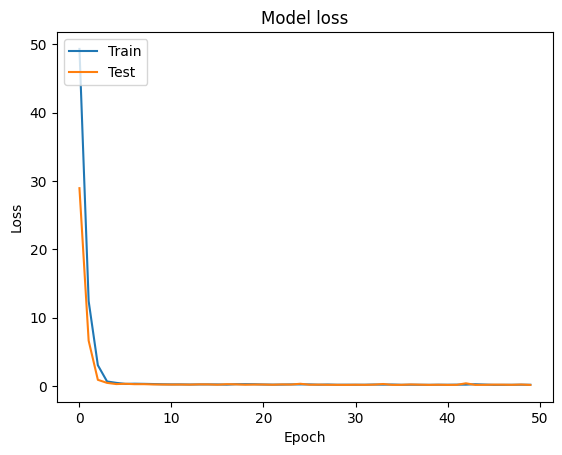

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


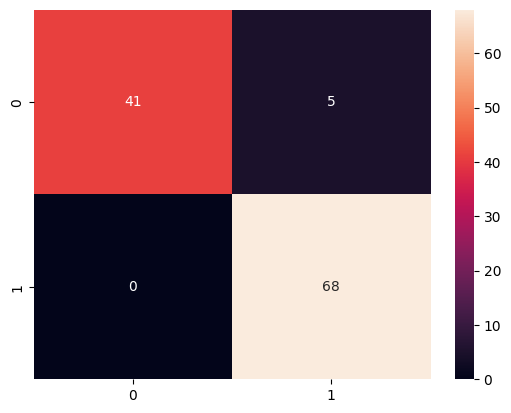

[[41  5]
 [ 0 68]]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


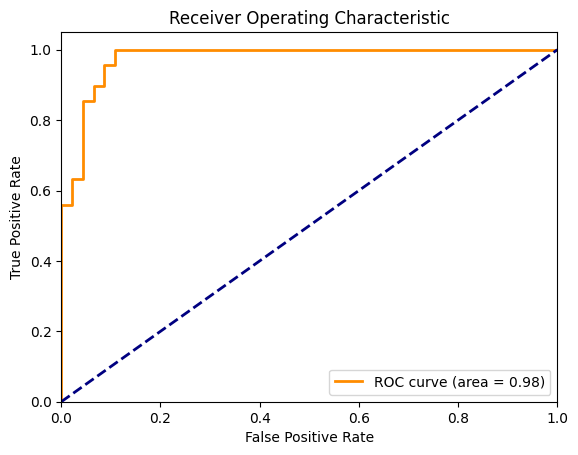

0.9760230179028133
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Recall:  1.0
Precision:  0.9315068493150684
F1 score:  0.9645390070921985


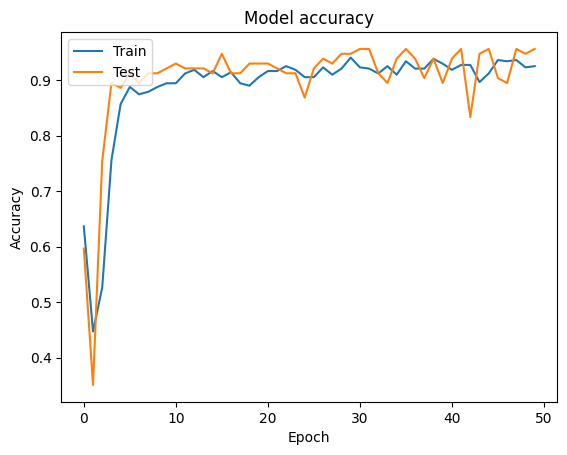

0.9251101613044739
0.9561403393745422


In [39]:
def main():
  features, labels = load_data(path, file="/Cancer_Data.csv")
  X_train, X_test, y_train, y_test = separete_data(labels, features)

  print("X_train shape:", X_train.shape)
  print("X_test shape:", X_test.shape)
  print("y_train shape:", y_train.shape)
  print("y_test shape:", y_test.shape)

  print(y_train.value_counts())
  print(y_test.value_counts())

  print(X_train.head())
  print(y_train.head())

  model = create_model(X_train.shape[1])
  history = train_model(model, X_train, y_train, X_test, y_test)

  print(history.history.keys())
  print(history.history['accuracy'][-1])
  print(history.history['val_accuracy'][-1])

  evaluate_model(model, X_test, y_test)

  print_loss_accuracy(history)
  print_matrix_confusion(model, X_test, y_test)
  print_curve_roc(model, X_test, y_test)
  print_recall_precision_f1_score(model, X_test, y_test)
  print_accuracy(history)

main()